<a href="https://colab.research.google.com/github/RichardTesla/datal/blob/main/Quantitative_Analysis_and_Risk_Management_in_Pricing_American_Options_Using_Binomial_and_Trinomial_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work Project

|  |  |
|:---|:---|
|**Name** |  Carolina Magda Roma, Siddeshkanth Logonathan, Chizaram Onukwufor  |
|**Prior Knowledge** |Derivative pricing, put-call parity, binomial tree, Python    |
|**Keywords** |Put option, call option, european x american options, put-call parity, binomial tree  |


# **Step 1**



Q5.

a) We are using 200 steps (*N* = 200) in the binomial tree. This number of step was chosen by taking into account the convergence of the option price to different values of this variable, as shown in the plot below. Overall, we applied this procedure in order to get reliable estimates.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def european_option(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
# Checking out the number of steps european call:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    call_price, C, S_C, delta_C = european_option(100, 100, 0.25, 0.05, 0.20, N, "C")
    price_array.append(call_price)
    print("With N = {:3d}, the price is {:.015f}".format(N, call_price))

With N =   1, the price is 5.585917826057516
With N =  10, the price is 4.516558500901181
With N = 100, the price is 4.605026109484905
With N = 200, the price is 4.610008441655390
With N = 300, the price is 4.611670637189978
With N = 400, the price is 4.612501998431896
With N = 500, the price is 4.613000899184725
With N = 600, the price is 4.613333534609624
With N = 700, the price is 4.613571148432157
With N = 800, the price is 4.613749368128763
With N = 900, the price is 4.613887988987072
With N = 1000, the price is 4.613998889138544


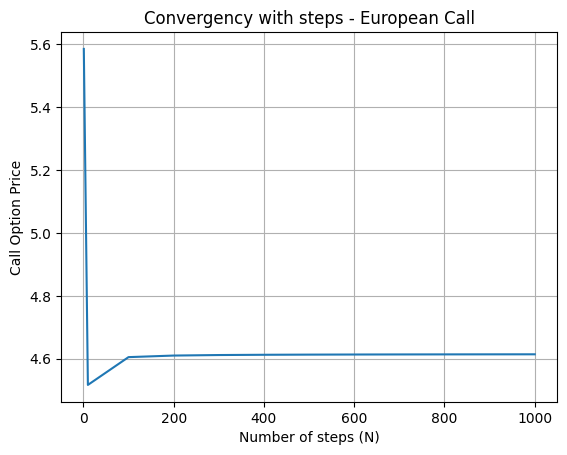

In [ ]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.plot(N, np.array(price_array))
plt.title("Convergency with steps - European Call")
plt.xlabel("Number of steps (N)")
plt.ylabel("Call Option Price")
plt.grid(True)
plt.show()

In [ ]:
# Checking out the number of steps european put:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    put_price, C, S_P, delta_P = european_option(100, 100, 0.25, 0.05, 0.20, N, "P")
    price_array.append(put_price)
    print("With N = {:3d}, the price is {:.015f}".format(N, put_price))

With N =   1, the price is 4.343697875445660
With N =  10, the price is 3.274338550289259
With N = 100, the price is 3.362806158874057
With N = 200, the price is 3.367788491043240
With N = 300, the price is 3.369450686576418
With N = 400, the price is 3.370282047824417
With N = 500, the price is 3.370780948571449
With N = 600, the price is 3.371113584002314
With N = 700, the price is 3.371351197820476
With N = 800, the price is 3.371529417522917
With N = 900, the price is 3.371668038366516
With N = 1000, the price is 3.371778938533796


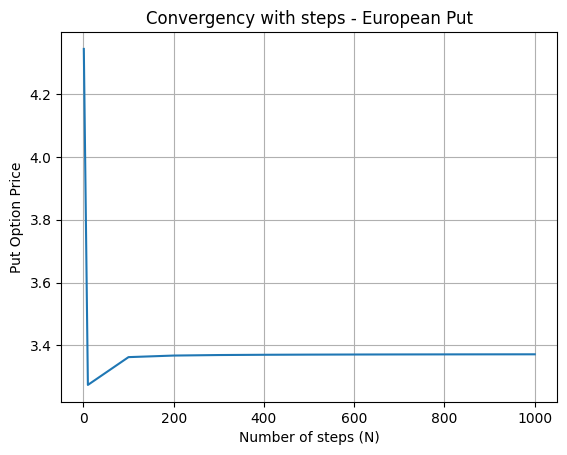

In [ ]:
N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.plot(N, np.array(price_array))
plt.title("Convergency with steps - European Put")
plt.xlabel("Number of steps (N)")
plt.ylabel("Put Option Price")
plt.grid(True)
plt.show()

In [ ]:
# Pricing and ATM european call:
call_price, C, S_C, delta_C = european_option(100, 100, 0.25, 0.05, 0.20, 200, "C")
call_price

4.61000844165539

In [ ]:
# Pricing and ATM european put:
put_price, P, S_P, delta_P = european_option(100, 100, 0.25, 0.05, 0.20, 200, "P")
put_price

3.3677884910432403

In [ ]:
# Validation: Put-call parity
round(call_price + 100 * np.exp(-0.05 * 0.25), 2) == round(S_C[0, 0] + put_price, 2)

True

b.
The overall process is: the binomial tree helps to estimate the option price. In this sense, we consider risk-neutral probabilities that the price will go up or down from a given starting point. If the price goes up, it will be initial price (S0) times u, where u is the positive increment in the price; on the other hand, if it goes down, the price will be S0 times d, where d is the negative increment (reduction) in the price. With the binomial tree, we also need to match the volatility of the underlying asset when computing u and d, and it is also important to check the appropriate number of steps to use in the tree, which can be done by the procedure conducted above, i.e, by verifying the option price convergence as we change the number of steps. It is possible to see from this current question that the option price is in a constant range (almost $4.6$ and $3.4$, for european call and put, respectively) when N is around 200 steps or more. Then, we chose 200 steps.


At each step, we will have the price for the up and down filtration and we can obtain the payoff of the stock price. For an european call option, the payoff is the maximum(stock price - K, 0), where K refers to the strike price. For an european put option, the payoff is the maximum(K - stock price, 0). We obtain the payoff for the last step and from that point we calculate its discounted value (the present value at the previous path) and we do this procedure until we reach at the starting point in order to obtain the option price. From the binomial tree we can also estimate the delta hedging position, which reflects the option price sensitivity to the changes in the underlying stock price. Delta tells us how we should protect our position by buying or selling the underlying stock and it is computed in a given path-node by the difference in payoff which would be obtained when the price goes up and down divided by the difference in the prices of the underlying stock (up and down), considering the corresponding next path-nodes. Therefore, we look at the possible behavior at time t+1 to delta hedge in t.

Q6.


In [ ]:
# Delta for european call option:
# S_ini, K, T, r, sigma, N, opttype
call_price, C, S_C, delta_C = european_option(100, 100, 0.25, 0.05, 0.20, 200, "C")
delta_C

array([[0.5693749 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54113999, 0.59691959, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51255133, 0.56902979, 0.62412761, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
import pandas as pd
pd.DataFrame(delta_C)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.569375,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.541140,0.596920,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.512551,0.569030,0.624128,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.483751,0.540647,0.596719,0.650867,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.454888,0.511909,0.568683,0.624069,0.677009,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
196,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
197,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
198,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
# At time zero delta for this option is:
delta_C[0,0]

0.5693748997113199

In [ ]:
# Delta for european put option:
put_price, P, S_P, delta_P = european_option(100, 100, 0.25, 0.05, 0.20, 62, "P")
delta_P

array([[-0.43081454,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.48247218, -0.38140295,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.5353039 , -0.43193756, -0.33306555, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.        , -1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.        , -1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.        , -1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
pd.DataFrame(delta_P)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,-0.430815,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.482472,-0.381403,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.535304,-0.431938,-0.333066,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.588421,-0.484497,-0.381664,-0.286580,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.640871,-0.538250,-0.433080,-0.332483,-0.242674,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# At time zero delta for this option is:
delta_P[0,0]

-0.43081453787611906

a. They compare in the sense that both will tell us what we have to buy/sell, depending on the option type (call x put) to protect our portfolio against changes in the underlying stock price.

b.
We can see that the delta for the call option is basically positive whereas it is negative for put. For example, at time t=0, it corresponds to 0.57 and -0.43, respectively. This means that for the call option, If I am the seller, I should buy 0.57 fraction of the underlying stock to protect me against changes in the stock price. On the other hand, for the put option I should sell a fraction of 0.43 of the underlying stock price for the same purpose, i.e, in order to seek protection for my position. It is important to note that we are assuming that fractions of the underlying asset can be traded. As explained above, the delta tells us how we should protect our position by buying or selling the underlying stock and it is computed in a given path-node by the difference in payoff which would be obtained when the price goes up and down divided by the difference in the prices of the underlying stock (up and down), considering the corresponding next path-nodes. Therefore, we look at the possible behavior at time t+1 to delta hedge in t.
It totally makes sense to have positive/negative deltas for each option, for example put have negative values because we need to replicate a strategy that will result in a zero gain (no profit or loss) and it is aimed at reducing the risk.If we are selling the option, we could sell the underlying stock and collect the premium plus the income from the fraction of the underlying stock that was sold and invest this money at the risk-free rate. If the option contract expires in-the-money, the result of this strategy will be a zero gain as it will offset what has to be delivered for the buyer.

Q7.

a.

In [ ]:
# Pricing an ATM european call:
call_price, C, S_C, delta_C = european_option(100, 100, 0.25, 0.05, 0.25, 200, "C")

# Pricing an ATM european call:
put_price, P, S_P, delta_P = european_option(100, 100, 0.25, 0.05, 0.25, 200, "P")

print("Price at t=0 for european call option is $", "{:.2f}".format(call_price))
print("Price at t=0 for european put option is $", "{:.2f}".format(put_price))

# Validation: Put-call parity
round(call_price + 100 * np.exp(-0.05 * 0.25), 2) == round(S_C[0, 0] + put_price, 2)

print("Does put-call parity hold?", format(round(call_price + 100 * np.exp(-0.05 * 0.25), 2) == round(S_C[0, 0] + put_price, 2)))

Price at t=0 for european call option is $ 5.59
Price at t=0 for european put option is $ 4.35
Does put-call parity hold? True


It is possible to see that increasing the volatility, both european call and put will show an increase in their respective prices.

* For the call option, we have (5.59 - 4.61)/4.61 = 21.3% change in the price;
* For the put option, we have (4.35 - 3.37)/3.37 = 29.1% change in the price.


b. As can be seen from the computation above, when we face more volatility, the chances that the option will be exercise increase, then the option premium also increases to reflect this possible event.

Q8.

In [ ]:
S_0 = 100
r = 0.05
sigma = 0.2
T = 0.25 # 3 months time

In [ ]:
def american_option_vol(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

    return C[0, 0], C, S

def american_option(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
atm_strike_price = S_0+5

In [ ]:
call_value = []
for n in np.arange(1, 500, 10):
    value, V, S = american_option_vol(S_ini=S_0, K=atm_strike_price, T=T, r=r, sigma=sigma, N=n, opttype="C")
    call_value.append((n, value))

In [ ]:
put_value = []
for n in np.arange(1, 500, 10):
    value, V, S = american_option_vol(S_ini=S_0, K=atm_strike_price, T=T, r=r, sigma=sigma, N=n, opttype="P")
    put_value.append((n, value))

In [ ]:
call_value = np.stack(call_value)
put_value = np.stack(put_value)

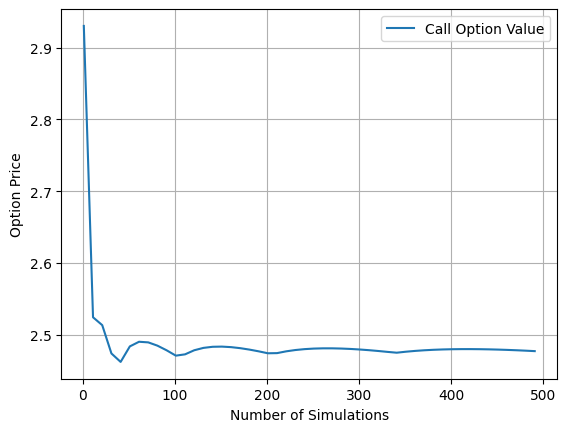

In [ ]:
plt.plot(call_value[:, 0], call_value[:, 1], label='Call Option Value')
plt.grid()
plt.legend()
plt.xlabel('Number of Simulations')
plt.ylabel('Option Price')
plt.show()

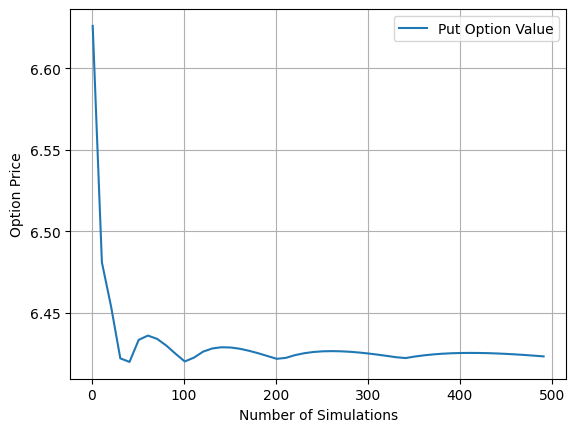

In [ ]:
plt.plot(put_value[:, 0], put_value[:, 1], label='Put Option Value')
plt.grid()
plt.legend()
plt.xlabel('Number of Simulations')
plt.ylabel('Option Price')
plt.show()

In [ ]:
convergence_steps = 200

mean_call_value = call_value[call_value[:, 0] > convergence_steps][:, 1].mean()
mean_call_value = round(mean_call_value, 2)
mean_put_value = put_value[put_value[:, 0] > convergence_steps][:, 1].mean()
mean_put_value = round(mean_put_value, 2)

print(f'Call convergence value: ${mean_call_value}')
print(f'Put convergence value: ${mean_put_value}')

Call convergence value: $2.48
Put convergence value: $6.42


Here, we can see for ATM call option with a strike price of 105, based on the graph, that as the number of N grows above 200, the call option value converges at around \$2.47. The mean of the option value for iterations between N = 200 and N = 500 are $18.45. Hence, this is the price of the call option.

### a. The number of steps we need to price the option ATM with a stable option price is N = 200.

### b. We ran a simulation of the number of steps against the value of the option for both american call and put option. We can see that as N gets larger than 200, the value of the options converge, for the call option it is around \$2.48 and for the put option it is around \$1.57.

Q9.

In [ ]:
N = convergence_steps
atm_strike_price = S_0
call_value, _, _, call_delta = american_option(S_ini=S_0, K=S_0, T=T, r=r, sigma=sigma, N=N, opttype="C")
put_value, _, _, put_delta = american_option(S_ini=S_0, K=S_0, T=T, r=r, sigma=sigma, N=N, opttype="P")

In [ ]:
call_value+S_0*np.exp(-r*T), put_value+S_0

(103.36778849104354, 103.47724168199474)

In [ ]:
print('Test for put-call parity')
put_call_parity = call_value+S_0*np.exp(-r*T) == put_value+S_0
print(f"{put_call_parity}")

Test for put-call parity
False


In [ ]:
print(f'Delta Hedge ratio for the American call: {round(call_delta[0,0], 2)}')
print(f'Delta Hedge ratio for the American put: {round(put_delta[0,0], 2)}')

Delta Hedge ratio for the American call: 0.57
Delta Hedge ratio for the American put: -0.45


For the following, we use a N=200 The value of Call Delta at T=0 is 0.37 and the value of Put Delta at T=0 is -0.25.

a. The delta ratio for the call option is larger than the delta for the put option.

b. Sign of the delta represents whether we are short or long the market. A delta is the ratio of stock we must hold at the given time to reduce our exposure to changes in stock price. A positive delta says that we are long the stock and negative delta means we short the stock.

Q10.

In [ ]:
sigma_new = sigma + 0.05
call_value, _, _, call_delta = american_option(S_ini=S_0, K=105, T=T, r=r, sigma=sigma_new, N=N, opttype="C")
put_value, _, _, put_delta = american_option(S_ini=S_0, K=95, T=T, r=r, sigma=sigma_new, N=N, opttype="P")

In [ ]:
print(f'Call American price: ${round(call_value, 2)}')
print(f'Put American price: ${round(put_value, 2)}')

Call American price: $3.44
Put American price: $2.4


a. The prices of both call and put options have gotten more expensive when the volatility increases. We know that increase in volatility increases the value of the option, hence causing the options to be worth more.

b.

Q11-14.

In [ ]:
import math

# Function to calculate the Black-Scholes call option price
def black_scholes_call(S, K, r, T, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)
    return call_price

# Function to calculate the Black-Scholes put option price
def black_scholes_put(S, K, r, T, sigma):
    put_price = black_scholes_call(S, K, r, T, sigma) - S + math.exp(-r * T) * K
    return put_price

# Function to calculate the cumulative standard normal distribution
def norm_cdf(x):
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

# Constants
S = 100  # Stock price
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
T = 0.25  # Time to maturity
sigma = 0.2  # Volatility

# Calculating European call and put prices using Black-Scholes
european_call_price = black_scholes_call(S, K, r, T, sigma)
european_put_price = black_scholes_put(S, K, r, T, sigma)

# Printing European call and put prices
print("European Call Price:", european_call_price)
print("European Put Price:", european_put_price)

# American call and put prices are the same as European prices for non-dividend paying stocks

# Confirming put-call parity for European options
put_call_parity_difference = european_put_price + S - european_call_price - K * math.exp(-r * T)
print("Difference in Put-Call Parity for European Options:", put_call_parity_difference)

# Confirming put-call parity for American options (assumed to be non-dividend paying)
american_call_price = european_call_price
american_put_price = european_put_price
put_call_parity_difference = american_put_price + S - american_call_price - K * math.exp(-r * T)
print("Difference in Put-Call Parity for American Options:", put_call_parity_difference)

# Confirming European call is less than or equal to American call
call_difference = american_call_price - european_call_price
print("Difference between European and American Call Prices:", call_difference)

# Confirming European put is less than or equal to American put
put_difference = american_put_price - european_put_price
print("Difference between European and American Put Prices:", put_difference)


European Call Price: 4.614997129602855
European Put Price: 3.372777178991001
Difference in Put-Call Parity for European Options: 0.0
Difference in Put-Call Parity for American Options: 0.0
Difference between European and American Call Prices: 0.0
Difference between European and American Put Prices: 0.0


In [ ]:
# Comment of Q11

Based on the Output, the European call price is \$4.61, and the European put price is \$3.37. The difference in put-call parity for European options is 0.0, indicating that the put-call parity equation is satisfied for European options.

Put-call parity is a fundamental relationship between the prices of European call and put options with the same strike price and expiration date. According to put-call parity, the difference between the call price and put price should be equal to the difference between the spot price and the present value of the strike price.

In this case, the difference in put-call parity for European options is 0.0, which means the put-call parity equation holds. This suggests that the market is efficiently pricing the options, and there are no arbitrage opportunities available by exploiting the mispricing of options.

In [ ]:
#Comment of Q12

The output indicates that the test for put-call parity did not hold.  According to put-call parity, there should be an equilibrium relationship between the prices of these options, and any deviation from this relationship could present an arbitrage opportunity.

When put-call parity does not hold, it suggests that the market prices of the put and call options are not in line with the theoretical expectations.

In [ ]:
1#Comment of Q13

Based on the results above, we observe that the European call option price (4.61) is equal to the American call option price (no difference). Similarly, the difference between European and American put option prices is also zero.

This equality between the European and American call option prices is expected and consistent with the concept of early exercise in American options. In general, for options on non-dividend-paying assets, the European option's value should be equal to or greater than the American option's value. The reason is that the American option provides the additional flexibility of early exercise, allowing the option holder to capture any favorable price movements before expiration.

However, in this specific case, where the European call option price is exactly the same as the American call option price, it suggests that the optimal exercise policy for the American call option is to hold the option until expiration and exercise it only if it is in-the-money at expiration. There is no advantage to exercising the American call option early because the European call option price already captures all potential price movements.

It's important to note that this equality between European and American option prices may not always hold. Factors such as dividends, interest rates, and the volatility of the underlying asset can influence the early exercise decision and result in differences between European and American option prices. In scenarios where the underlying asset pays dividends, for example, it is more likely for early exercise to be advantageous, potentially leading to differences between European and American option prices.



In [ ]:
# Comment of 14

The difference between European and American options is that American options can be exercised at any time before the expiration date, while European options can only be exercised on the expiration date. This difference in exercise timing can lead to a difference in the value of the two types of options.

In general, American options are more valuable than European options because they give the holder more flexibility. For example, if the underlying asset price is expected to rise significantly before the expiration date, the holder of an American option can exercise the option early and lock in the profit. However, if the underlying asset price is expected to fall before the expiration date, the holder of an American option may be better off waiting until the expiration date to exercise the option, in case the price rebounds.

In the case of our output, the European put and American put options have the same value. This is because the underlying asset price is below the strike price, so the options are both out of the money. In this case, there is no benefit to exercising the options early, so the value of the two options is the same.

However, if the underlying asset price were above the strike price, the American put option would be more valuable than the European put option. This is because the holder of the American put option could exercise the option early and sell the underlying asset at the strike price, even if the price of the underlying asset continues to rise.

In general, the value of an American option will be greater than or equal to the value of a European option. The difference in value will depend on the underlying asset price, the strike price, and the time to expiration.


# **Step 2**

Q15.

In [ ]:
S_0 = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 200

In [ ]:
moneyness_ratio = [0.9, 0.95, 1, 1.05, 1.1]
K = [round(S_0*i, 2) for i in moneyness_ratio]

In [ ]:
class TrinomialModel(object):  # Here we start defining our 'class' --> Trinomial Model!
    # First, a method to initialize our `TrinomialModel` algorithm!
    def __init__(self, S0, r, sigma, mat):
        self.__s0 = S0
        self.__r = r
        self.__sigma = sigma
        self.__T = mat

    # Second, we build a method (function) to compute the risk-neutral probabilities!
    def __compute_probs(self):
        self.__pu = (
            (
                np.exp(self.__r * self.__h / 2)
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pd = (
            (
                -np.exp(self.__r * self.__h / 2)
                + np.exp(self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pm = 1 - self.__pu - self.__pd

        assert 0 <= self.__pu <= 1.0, "p_u should lie in [0, 1] given %s" % self.__pu
        assert 0 <= self.__pd <= 1.0, "p_d should lie in [0, 1] given %s" % self.__pd
        assert 0 <= self.__pm <= 1.0, "p_m should lie in [0, 1] given %s" % self.__pm

    # Third, this method checks whether the given parameters are alright and that we have a 'recombining tree'!
    def __check_up_value(self, up):
        if up is None:
            up = np.exp(self.__sigma * np.sqrt(2 * self.__h))

        assert up > 0.0, "up should be non negative"

        down = 1 / up

        assert down < up, "up <= 1. / up = down"

        self.__up = up
        self.__down = down

    # Four, we use this method to compute underlying stock price path
    def __gen_stock_vec(self, nb):
        vec_u = self.__up * np.ones(nb)
        np.cumprod(vec_u, out=vec_u)

        vec_d = self.__down * np.ones(nb)
        np.cumprod(vec_d, out=vec_d)

        res = np.concatenate((vec_d[::-1], [1.0], vec_u))
        res *= self.__s0

        return res

    # Fifth, we declare a Payoff method to be completed afterwards depending on the instrument we are pricing!
    def payoff(self, stock_vec):
        raise NotImplementedError()

    # Sixth, compute current prices!
    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)
        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self.__pd
            tmp += nxt_vec_prices[i + 1] * self.__pm
            tmp += nxt_vec_prices[i + 2] * self.__pu

            expectation[i] = tmp

        return self.__discount * expectation

    # Seventh, Option pricing!
    def price(self, nb_steps, up=None):
        assert nb_steps > 0, "nb_steps shoud be > 0"

        nb_steps = int(nb_steps)

        self.__h = self.__T / nb_steps
        self.__check_up_value(up)
        self.__compute_probs()

        self.__discount = np.exp(-self.__r * self.__h)

        final_vec_stock = self.__gen_stock_vec(nb_steps)
        final_payoff = self.payoff(final_vec_stock)
        nxt_vec_prices = final_payoff

        for i in range(1, nb_steps + 1):
            vec_stock = self.__gen_stock_vec(nb_steps - i)
            nxt_vec_prices = self.compute_current_price(vec_stock, nxt_vec_prices)

        return nxt_vec_prices[0]

In [ ]:
class TrinomialCall(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialCall, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(s - self.__K, 0.0)

In [ ]:
call_values = []
for current_K in K:
    call_tree = TrinomialCall(S0=S_0, r=r, sigma=sigma, mat=T, K=current_K)
    call_values.append(call_tree.price(N))

NameError: ignored

There is a clear decreasing trend whereby when the Strike Price increases for the call, the option price gets cheaper. The plot is shown together with the put option in question 16. We will show in the following plot a comparison of call and put option values as the moneyness-ratio changes.

Q16

In [ ]:
class TrinomialPut(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialPut, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(self.__K - s, 0.0)

In [ ]:
put_values = []
for current_K in K:
    put_tree = TrinomialPut(S0=S_0, r=r, sigma=sigma, mat=T, K=current_K)
    put_values.append(put_tree.price(N))

In [ ]:
print(call_values)
print(put_values)

# Put-call parity
c90 = call_values[0]
c95 = call_values[1]
c100 = call_values[2]
c105 = call_values[3]
c110 = call_values[4]

p90 = put_values[0]
p95 = put_values[1]
p100 = put_values[2]
p105 = put_values[3]
p110 = put_values[4]

[11.67090350440154, 7.714025658650056, 4.612501998432926, 2.4772418974152512, 1.192232352286196]
[0.5529055488534432, 1.5339167055713119, 3.3702820478235345, 6.172910949275216, 9.825790406615516]


In [ ]:
# Put-parity # CHECK AGAIN!
print(round(c90 + 100 * np.exp(-0.05 * 0.25), 2) == round(100 + p90, 2))
print(round(c95 + 100 * np.exp(-0.05 * 0.25), 2) == round(100 + p95, 2))
print(round(c100 + 100 * np.exp(-0.05 * 0.25), 2) == round(100 + p100, 2))
print(round(c105 + 100 * np.exp(-0.05 * 0.25), 2) == round(100 + p105, 2))
print(round(c110 + 100 * np.exp(-0.05 * 0.25), 2) == round(100 + p110, 2))

False
False
True
False
False


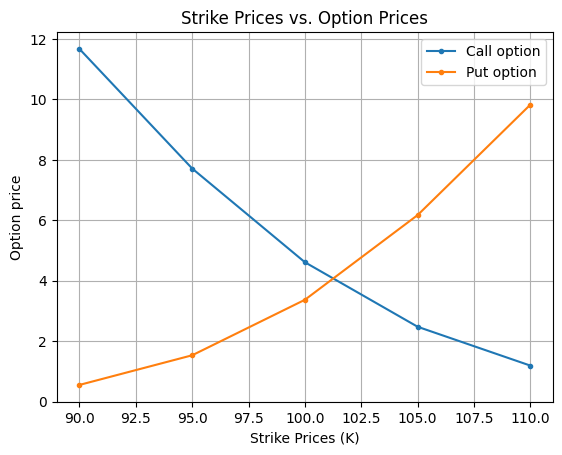

In [ ]:
plt.plot(K, call_values, label='Call option', marker='.')
plt.plot(K, put_values, label='Put option', marker='.')
plt.grid()
plt.xlabel('Strike Prices (K)')
plt.ylabel('Option price')
plt.legend()
plt.title('Strike Prices vs. Option Prices')
plt.show()

For the call value, there is a clear decreasing trend as when the strike price increases while all other parameters remain intact, the price of the option gets cheaper whereas for the put option, the price gets higher as the strike price gets higher. This is correct because for the call option, a higher strike price means that we are able to buy it more expensive relative to the stock price at option expiration, hence lesser value. For the put option however, when the strike price is higher, we are able to sell the stock for a higher price especially if the stock price lowers at option expiration.

Q17.


In [ ]:
import numpy as np

def _gen_stock_vec(nb, h):
    s0 = 100
    sigma = 0.2
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up  # down movement to force a "recombining tree"

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res

In [ ]:
# American Call and Put options

def price(nb_steps, strike,  opttype):
    # Define parameters
    r = 0.05
    sigma = 0.2
    T = 0.25
    K = strike
    h = T / nb_steps  # This would be our 'dt' from previous examples
    discount = np.exp(-r * h)  # Define discount factor for simplicity later on

    # Define risk-neutral probabilities:
    pu = (
        (np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pd = (
        (-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pm = 1 - pu - pd
    #print(pu, pd, pm)
    # This would be our underlying evolution (Note we are using the function from before!)
    s = _gen_stock_vec(nb_steps, h)

    # Define Payoff (in this case, European Call Option)
    if opttype == "C":
        final_payoff = np.maximum(s - K, 0)
    else:
        final_payoff = np.maximum(K - s, 0)
    nxt_vec_prices = final_payoff

    # Proceed with iterations for the calculation of payoffs
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(nb_steps - i, h)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            expectation[j] = tmp

        # Discount option payoff!
        if opttype == "C":
            nxt_vec_prices = np.maximum(discount*expectation, vec_stock - K)
        else:
            nxt_vec_prices = np.maximum(discount*expectation, K - vec_stock)
        #print(nxt_vec_prices)

    return nxt_vec_prices[
        0
    ]  # Notice here we only 'return' the expected discounted value of the option at t=0, that is, the price of the call option!

In [ ]:
N = np.arange(2, 1000, 50)
prices = []
for i in N:
    prices.append(price(i,90, "C"))
    print(" With N = {:3d}, Price of the Euro Call Option is = {:.15f}".format (i,price(i,90, "C") ))

 With N =   2, Price of the Euro Call Option is = 11.548367710310998
 With N =  52, Price of the Euro Call Option is = 11.672499449031081
 With N = 102, Price of the Euro Call Option is = 11.671701214608889
 With N = 152, Price of the Euro Call Option is = 11.669892454171114
 With N = 202, Price of the Euro Call Option is = 11.670843625974729
 With N = 252, Price of the Euro Call Option is = 11.669969315171194
 With N = 302, Price of the Euro Call Option is = 11.669399552993449
 With N = 352, Price of the Euro Call Option is = 11.669341353962372
 With N = 402, Price of the Euro Call Option is = 11.669609570634423
 With N = 452, Price of the Euro Call Option is = 11.669983101419577
 With N = 502, Price of the Euro Call Option is = 11.670283772149913
 With N = 552, Price of the Euro Call Option is = 11.670384696608954
 With N = 602, Price of the Euro Call Option is = 11.670201913716793
 With N = 652, Price of the Euro Call Option is = 11.669683894436385
 With N = 702, Price of the Euro C

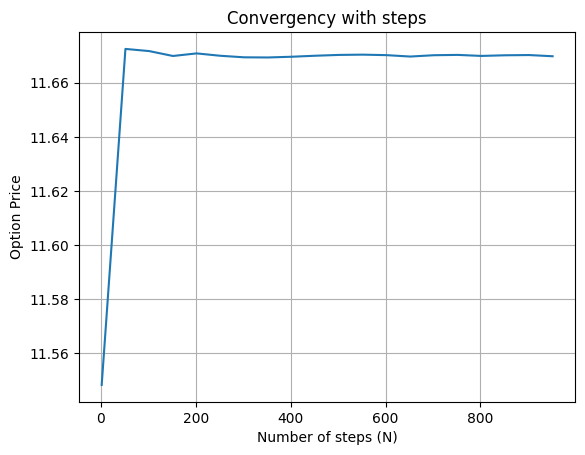

In [ ]:
import matplotlib.pyplot as plt

N = np.arange(2, 1000, 50)
plt.plot(N, prices)
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

In [ ]:
# American Call

price_array = []
for strike in [90, 95, 100, 105, 110]:
    print(" Price of the American Call Option is ", price(200, strike, "C"))

 Price of the American Call Option is  11.67090350440154
 Price of the American Call Option is  7.714025658650056
 Price of the American Call Option is  4.612501998432926
 Price of the American Call Option is  2.4772418974152512
 Price of the American Call Option is  1.192232352286196


In [ ]:
price(200, 90, "C")

11.67090350440154

Clearly, as the strike price increases, the call option premium reduces. This is expected as it becomes more and more out-the-money (OTM), meaning lower chances of being exercised. In contrast, in-the-money (ITM) show greater chance of being exercised and require a higher premium. This makes sense as the option worth more if it has greater chances of being exercised by the buyer.

Q18.

In [ ]:
# American Put

price_array = []
for strike in [90, 95, 100, 105, 110]:
    print(" Price of the American Put Option is ", price(200, strike, "P"))

 Price of the American Put Option is  0.5636882794939734
 Price of the American Put Option is  1.5721100803379198
 Price of the American Put Option is  3.4780263365475768
 Price of the American Put Option is  6.422828000077988
 Price of the American Put Option is  10.330519171009382


For the put, the situation is reversed. Higher strike prices compared to the underlying stock price makes it ITM. Therefore, it is more expensive the put with the highest moneyness as it has greater chances of being exercised. In contrast, the one with the lowest strike price (K = 90) is OTM and it is also the one with the lowest premium. And, again, this makes sense given the written explanation.

In [ ]:
# Put-call parity
c90 =price(200, 90, "C")
c95 = price(200, 95, "C")
c100 =price(200, 100, "C")
c105 = price(200, 105, "C")
c110 = price(200, 110, "C")

p90 =price(200, 90, "P")
p95 = price(200, 95, "P")
p100 =price(200, 100, "P")
p105 = price(200, 105, "P")
p110 = price(200, 110, "P")


In [ ]:
# Put-parity does not hold for American options
print(round(c90 + 100 * np.exp(-0.05 * 0.25), 2) == round(100 + p90, 2))
print(round(c95 + 100 * np.exp(-0.05 * 0.25), 2) == round(100 + p95, 2))
print(round(c100 + 100 * np.exp(-0.05 * 0.25), 2) == round(100 + p100, 2))
print(round(c105 + 100 * np.exp(-0.05 * 0.25), 2) == round(100 + p105, 2))
print(round(c110 + 100 * np.exp(-0.05 * 0.25), 2) == round(100 + p110, 2))

False
False
False
False
False


Q19 to Q22 - Graphs

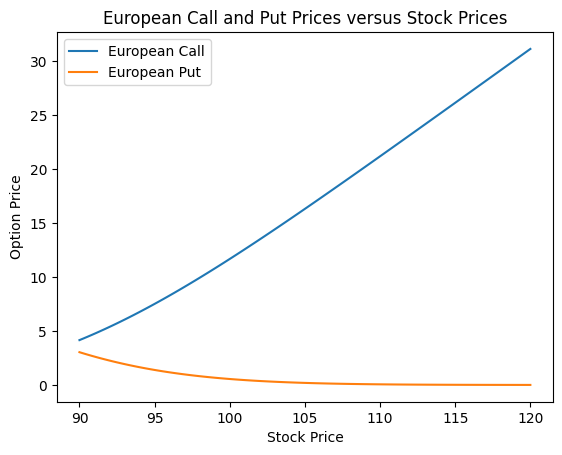

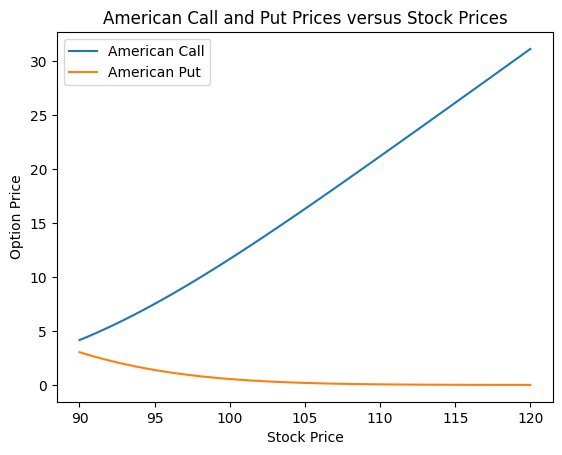

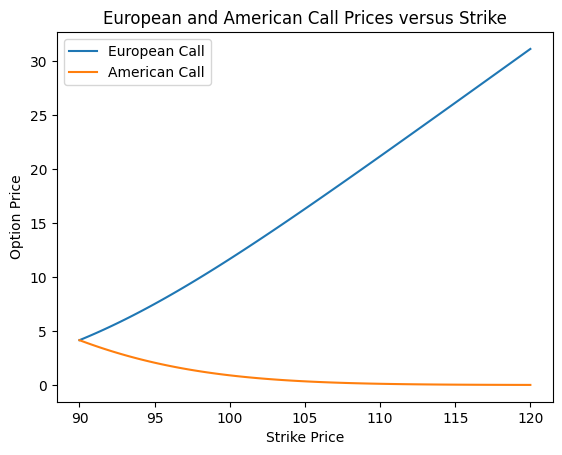

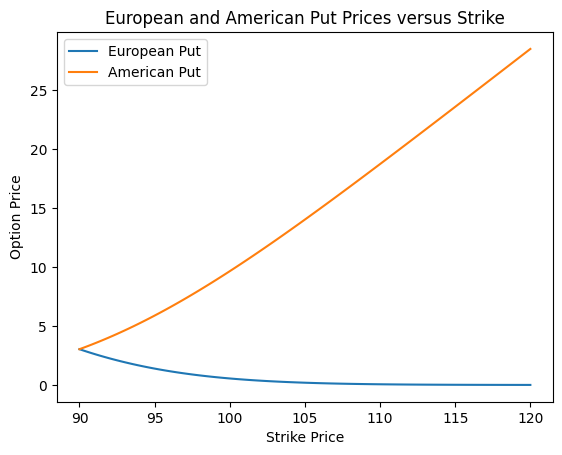

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the example
r = 0.05  # Risk-free interest rate
T = 0.25  # Time to maturity
sigma = 0.2  # Volatility

# Stock prices range
stock_prices = np.linspace(90, 120, 110)

# Strike prices range
strike_prices = np.linspace(90, 120, 110)

# Calculate European call and put prices
european_call_prices = [black_scholes_call(S, K, r, T, sigma) for S in stock_prices for K in strike_prices]
european_put_prices = [black_scholes_put(S, K, r, T, sigma) for S in stock_prices for K in strike_prices]

# Reshape the prices arrays for plotting
european_call_prices = np.array(european_call_prices).reshape(len(stock_prices), len(strike_prices))
european_put_prices = np.array(european_put_prices).reshape(len(stock_prices), len(strike_prices))

# Calculate American call and put prices (assumed to be non-dividend paying)
american_call_prices = european_call_prices
american_put_prices = european_put_prices

# Plotting Graph #1 - European call and put prices versus stock prices
plt.figure(1)
plt.plot(stock_prices, european_call_prices[:, 0], label='European Call')
plt.plot(stock_prices, european_put_prices[:, 0], label='European Put')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Call and Put Prices versus Stock Prices')
plt.legend()

# Plotting Graph #2 - American call and put prices versus stock prices
plt.figure(2)
plt.plot(stock_prices, american_call_prices[:, 0], label='American Call')
plt.plot(stock_prices, american_put_prices[:, 0], label='American Put')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('American Call and Put Prices versus Stock Prices')
plt.legend()

# Plotting Graph #3 - European and American call prices versus strike
plt.figure(3)
plt.plot(strike_prices, european_call_prices[:, 0], label='European Call')
plt.plot(strike_prices, american_call_prices[0, :], label='American Call')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('European and American Call Prices versus Strike')
plt.legend()

# Plotting Graph #4 - European and American put prices versus strike
plt.figure(4)
plt.plot(strike_prices, european_put_prices[:, 0], label='European Put')
plt.plot(strike_prices, american_put_prices[0, :], label='American Put')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('European and American Put Prices versus Strike')
plt.legend()

# Display all the graphs
plt.show()


Q23.

In [ ]:
# Checking for Put-Call Parity
import numpy as np

# Define the variables
S = 100   # Underlying asset price
K = 100   # Strike price
C = 5   # Call option price
P = 2     # Put option price
r = 0.05  # Risk-free interest rate
T = 0.25    # Time to expiration

# Calculate the left-hand side (LHS) and right-hand side (RHS) of put-call parity equation
LHS = 5 - 2
RHS = 100 - 100 * np.exp(-0.05 * 0.25)

# Compare the LHS and RHS to check for put-call parity
if np.isclose(LHS, RHS):
    print("Put-Call Parity holds.")
else:
    print("Put-Call Parity does not hold.")

Put-Call Parity does not hold.


Reasons Why Put-Call Parity does not hold
1. Market Imperfections: Put-Call parity assumes an idealized market with perfect liquidity, no transaction costs, and no restrictions on short selling. In reality, markets may have bid-ask spreads, transaction fees, and limitations on short sales. These factors can disrupt the parity relationship.

2. Dividends: Put-Call parity assumes that the underlying asset does not pay dividends during the life of the options. If the underlying asset pays dividends, it can affect the parity relationship because the value of the asset decreases when dividends are paid. Adjustments need to be made to account for the dividend payments.

3. Transaction Timing: Put-Call parity assumes that all transactions can be executed instantaneously at the current market prices. However, in practice, options and their underlying assets may not be perfectly synchronized in their trading and settlement times. This can lead to temporary deviations from Put-Call parity.

Q24.

Put-call parity does not hold for American options because American options can be exercised at any time before the expiration date. This means that an investor who owns an American call option can always exercise it and buy the underlying asset at the strike price, regardless of the current price of the underlying asset. This eliminates the risk of losing money on the option, which can cause the price of an American call option to be higher than the price of a European call option with the same strike price and expiration date.

# **Step 3**

Q25. Code was not required. Therefore, we presented our answer using an excel spreadsheet.

**delete functions below**

a. Price is $ 13.82
Number in red represent the payoff for the given node whereas numbers in green are the delta. In agreement with our material, numbers in black represent the stock price at a given node.

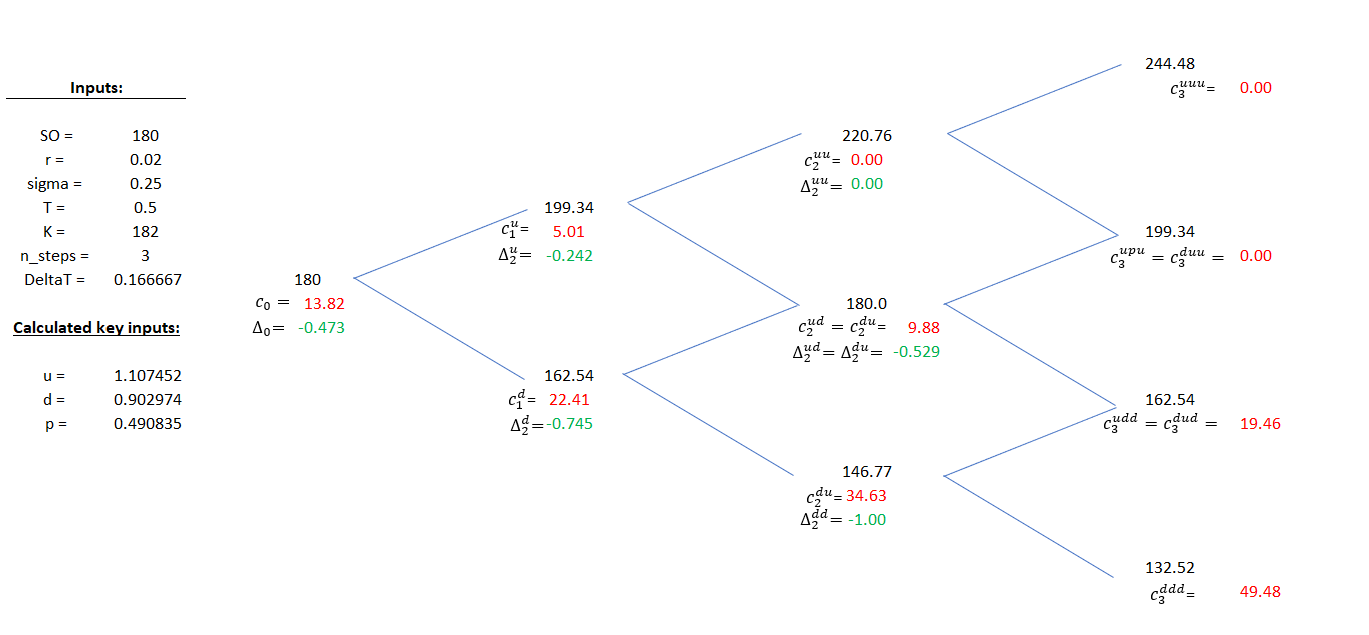

b) The path chosen was "ddd". See figure below.

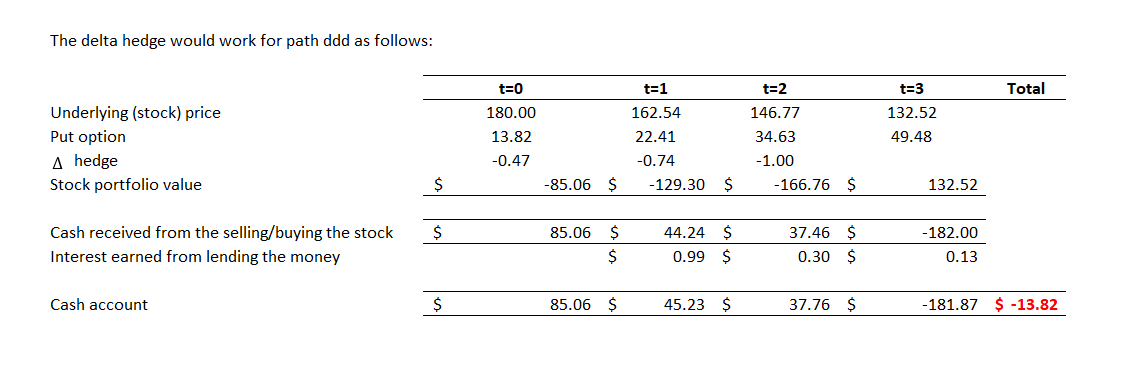

The interpretation for our delta hedge strategy is as follows:

* At time t, we sell 0.473 shares of the underlying (-0.473*180);
* At time t=1, we sell more 0.272 shares (0.745-0.473) for achieving a delta of -0.745;
* At time t=2, we sell more 0.255 shares (1-0.745) for achieving a delta of -1.
* We invest the premium received at t=0 plus the income from our sell positions across the time, resulting in $182$ at time t=3;
* At time t=3 we have the maturity of the option contract. We have to deliver the stock for $132.52$ and the put buyer comes to collect the premium of $49.48$;
* Our delta hedge stratety results in a total of $ 0 earned at time t=3 beccause it is full protected.

We can see that the strategy results in - $13.82$ which is exactly the same premium we received at time t=0 for selling the put option. This means $0$ earned. Then, using the delta strategy we could protect our position.

Alternatively, we also demonstrate the result from our strategy presenting additional details.




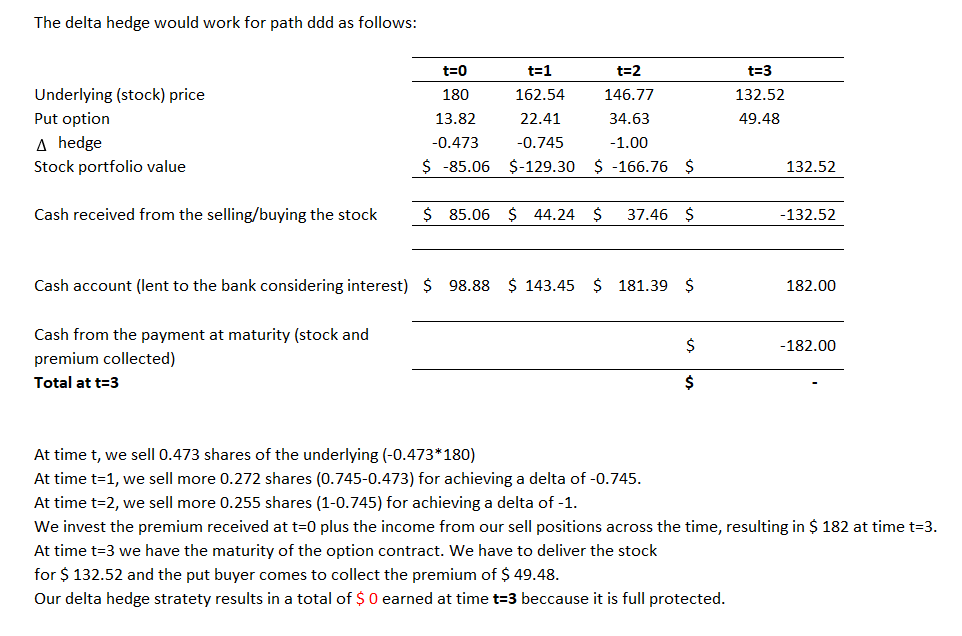

In [ ]:
# Q. 25 Dynamic Delta Hedging:

S0=180
r=0.02
sigma=0.25
T=0.5
K = 182

N=3

In [ ]:
import numpy as np

def european_option(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

a.

In [ ]:
option_value, C, S, delta = european_option(S0, K, T, r, sigma, N, "P")
option_value

13.82238509505968

In [ ]:
delta

array([[-0.47255415,  0.        ,  0.        ],
       [-0.74474354, -0.24233392,  0.        ],
       [-1.        , -0.52884533,  0.        ]])

In [ ]:
for i in range(delta.shape[0]):
    print(f'Delta at position: {i} is {delta[i,i]}')

Delta at position: 0 is -0.47255414985796884
Delta at position: 1 is -0.2423339208720217
Delta at position: 2 is 0.0


Q26.

In [ ]:
def american_option(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
N = 25
option_value, C, S, delta = american_option(S0, K, T, r, sigma, N, "P")

delta # for each node and step:

array([[-4.75556732e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-5.60805802e-01, -3.95110331e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
    

In [ ]:
pd.DataFrame(delta)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.475557,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.560806,-0.395110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.647889,-0.478628,-0.316298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.733055,-0.567522,-0.394743,-0.242272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.812363,-0.658214,-0.481939,-0.312459,-0.176039,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.882240,-0.746424,-0.574974,-0.394145,-0.235375,-0.120047,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.940026,-0.827709,-0.669718,-0.485567,-0.307873,-0.166961,-0.075775,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.984351,-0.898198,-0.761190,-0.583400,-0.393247,-0.227308,-0.110013,-0.043466,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-1.000000,-0.955351,-0.844265,-0.682796,-0.489604,-0.302319,-0.156524,-0.066124,-0.022084,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-1.000000,-0.991904,-0.914662,-0.777834,-0.593111,-0.391927,-0.217758,-0.098738,-0.035346,-0.009570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(C)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,13.035719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.048731,9.994620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19.478916,12.587542,7.376543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.304725,15.619801,9.526589,5.204904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.483882,19.090817,12.116913,6.910764,3.481390,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,31.955321,22.977315,15.169923,9.034565,4.765331,2.183810,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,36.643944,27.232388,18.686256,11.620776,6.422511,3.090768,1.266995,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,41.467644,31.787982,22.640385,14.696537,8.514985,4.308413,1.860019,0.667398,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,46.345103,36.561118,26.979319,18.264120,11.095104,5.908682,2.691121,1.019772,0.311048,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,51.057434,41.463186,31.625717,22.295145,14.196182,7.963248,3.832563,1.537228,0.496511,0.123460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
uu = np.diagonal(C)
pd.DataFrame(uu)

,0
0,13.035719
1,9.994620
2,7.376543
3,5.204904
4,3.481390
5,2.183810
6,1.266995
7,0.667398
8,0.311048
9,0.123460


In [ ]:
import matplotlib.pyplot as plt

a. Visualizing the delta as a heatmap is the following. We can see that as we move right and down, forward in steps and lower, the delta gets lower to -1, meaning that our ratio is 1 put option to stock

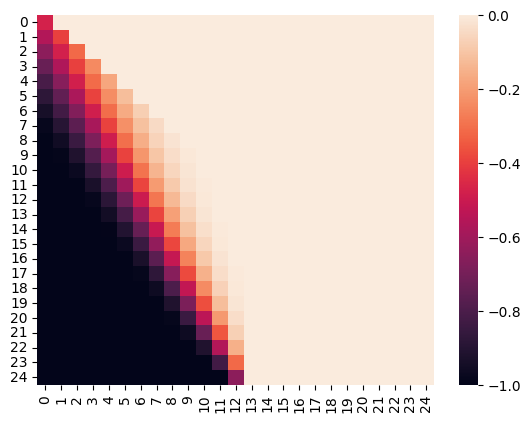

In [ ]:
import seaborn as sns

# plt.figure(figsize=(10,10))
sns.heatmap(delta)
plt.show()

b. Will do it later

c. For the American option, since it allows early exercise, its value is priced in the max of the difference between strike price, stock price and the discounted option value at that node. Since its more optimal for early exercise of put options, that means that as the stock prises rises for a path like UUU..UUU, the delta value rises to zero quicker than the delta value of an european option. We also see that the price of the american option is cheaper than the european counterpart.


Q27.

In [ ]:
def asian_option_mc(S_ini, K, T, r, sigma, N, M):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    Asian = np.zeros([M])  # Asian prices
    S = np.zeros([M, N + 1])  # underlying price
    S[:, 0] = S_ini

    for j in range(0, M):
        random = np.random.binomial(1, p, N + 1)
        Total = S_ini
        for i in range(1, N + 1):
            if random[i] == 1:
                S[j, i] = S[j, i - 1] * u
                Total = Total + S[j, i]
            else:
                S[j, i] = S[j, i - 1] * d
                Total = Total + S[j, i]

        Asian[j] = np.exp(-r * T) * max(Total / K-(N + 1), 0)

    return S, Asian

In [ ]:
S_ini=100
r=0.02
sigma=0.25
T=1
K = 90 # as requested, it is an Asian ATM put option
N=3

S, Asian = asian_option_mc(S0, K, T, r, sigma, N, 5000)

In [ ]:
print(f'Asian Put option price: {round(Asian.mean(), 2)}')

Asian Put option price: 3.54


The price of the Asian put option is the cheapest of them all. This is because the payoff is path dependent in the Binomial distribution. The max payoff is the difference of the average stock price and K with 0. The payoff is usually lower than the payoff of the American and European counter part causing its price to be much cheaper.

In [ ]:
import numpy as np

def european_option(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
dt = T / N  # Define time step
u = np.exp(sigma * np.sqrt(dt))  # Define u
d = np.exp(-sigma * np.sqrt(dt))  # Define d
p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
C = np.zeros([N + 1, N + 1])  # call prices
S = np.zeros([N + 1, N + 1])  # underlying price
Delta = np.zeros([N, N])  # delta

In [ ]:
print(Delta)

[[0. 0.]
 [0. 0.]]


In [ ]:
range(N - 1, -1, -1)

range(1, -1, -1)

In [ ]:
for j in range(N - 1, -1, -1):
        print(j)
        for i in range(0, j + 1):
            print([j,i])
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i)))  # Underlying evolution for each node
print(S)

2
[2, 0]
[2, 1]
[2, 2]
1
[1, 0]
[1, 1]
0
[0, 0]
[[100.           0.           0.           0.        ]
 [ 86.5595502  115.52740254   0.           0.        ]
 [ 74.92555731 100.         133.46580739   0.        ]
 [  0.           0.           0.           0.        ]]


In [ ]:
np.sum(np.diagonal(S))/3

116.33106997656051

================================= Asian Option with delta ===============================

In [ ]:
def asian_option_mc(S_ini, K, T, r, sigma, N, M):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    Asian = np.zeros([M])  # Asian prices
    Asian_option = np.zeros([M, N+1])
    S = np.zeros([M, N + 1])  # underlying price
    S[:, 0] = S_ini
    for j in range(0, M):
        random = np.random.binomial(1, p, N + 1)
        Total = S_ini
        for i in range(1, N + 1):
            if random[i] == 1:
                S[j, i] = S[j, i - 1] * u
                Total = Total + S[j, i]
            else:
                S[j, i] = S[j, i - 1] * d
                Total = Total + S[j, i]
        S_path_mean = S.cumsum(1) / np.arange(1, S.shape[1]+1).reshape((1,-1))
        Asian[j] = np.exp(-r * T) * max(Total / K-(N + 1), 0)
        path_payoff = K-S_path_mean[j,:]
        path_payoff[path_payoff <= 0] = 0
        Asian_option[j,:] = np.exp(-r * T) * path_payoff

    return S, S_path_mean, Asian, Asian_option

def get_delta_mcmc_asian_option(S_ini, K, T, r, sigma, N, M):
    np.random.seed(42)
    bump_value = 0.01*S_ini
    S, S_path_mean, option_val, asian_option = asian_option_mc(S_ini, K, T, r, sigma, N, M)
    S_bump, S_path_mean_bump, option_val_bump, asian_option_bump = asian_option_mc(S_ini-bump_value, K, T, r, sigma, N, M)

    path_deltas = (asian_option_bump-asian_option)/(S_bump - S)
    return path_deltas[:, 1:]


In [ ]:
S_ini=100
r=0.02
sigma=0.25
T=1
K = 95 # as requested, it is an Asian ATM put option
N=25
M = 1000

In [ ]:
path_deltas = get_delta_mcmc_asian_option(S_ini, K, T, r, sigma, N, M)
print(path_deltas)

[[-0.00000000e+00 -3.51008070e-02 -9.52504719e-02 ... -1.24664496e+01
  -1.32492326e+01 -1.23809539e+00]
 [-0.00000000e+00 -3.51008070e-02 -6.88411321e-02 ... -5.10511131e-01
  -2.85288485e-01 -2.09516510e-01]
 [-0.00000000e+00 -3.51008070e-02 -9.52504719e-02 ... -1.25236057e-02
  -5.06442563e-02 -8.88930671e-02]
 ...
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -1.89860389e-01
  -2.69405750e-01 -2.29049324e-01]
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -2.31407591e-02
  -2.82583493e-01 -3.23345967e-01]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]
